In [1]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2=pd.read_csv('Gold.csv')

In [3]:
df2.head()

,6M return,1Y return,2Y return,3Y return,5Y return,Predict,Month
0,34.2%,9.9%,17.5%,15.0%,9.0%,-1.2%,Jan-04
1,23.0%,6.9%,12.8%,14.6%,8.5%,1.0%,Feb-04
2,10.8%,12.7%,13.0%,14.2%,8.5%,3.8%,Mar-04
3,6.2%,14.0%,9.4%,13.3%,8.0%,6.0%,Apr-04
4,-4.4%,3.6%,6.1%,10.7%,8.0%,5.7%,May-04


In [4]:
df2['6M return'] = df2['6M return'].astype(str).str.replace('%', '').astype(float)
df2['1Y return'] = df2['1Y return'].astype(str).str.replace('%', '').astype(float)
df2['2Y return'] = df2['2Y return'].astype(str).str.replace('%', '').astype(float)
df2['3Y return'] = df2['3Y return'].astype(str).str.replace('%', '').astype(float)
df2['5Y return'] = df2['5Y return'].astype(str).str.replace('%', '').astype(float)
df2['Predict']=df2['Predict'].astype(str).str.replace('%', '').astype(float)
df2.tail()

,6M return,1Y return,2Y return,3Y return,5Y return,Predict,Month
235,7.7,13.3,9.6,2.7,13.7,30.2,Aug-23
236,2.4,17.9,10.3,4.1,13.0,35.1,Sep-23
237,-5.8,16.1,9.3,4.4,12.2,42.0,Oct-23
238,1.8,17.3,10.4,6.1,13.6,35.3,Nov-23
239,12.0,14.1,11.9,7.3,13.8,32.9,Dec-23


In [5]:
df2.isnull().sum()

6M return    0
1Y return    0
2Y return    0
3Y return    0
5Y return    0
Predict      0
Month        0
dtype: int64

In [6]:
df2.tail()


,6M return,1Y return,2Y return,3Y return,5Y return,Predict,Month
235,7.7,13.3,9.6,2.7,13.7,30.2,Aug-23
236,2.4,17.9,10.3,4.1,13.0,35.1,Sep-23
237,-5.8,16.1,9.3,4.4,12.2,42.0,Oct-23
238,1.8,17.3,10.4,6.1,13.6,35.3,Nov-23
239,12.0,14.1,11.9,7.3,13.8,32.9,Dec-23


In [7]:
month=df2['Month']
month_index=df2.index
print(type(month))
print(month)

<class 'pandas.core.series.Series'>
0      Jan-04
1      Feb-04
2      Mar-04
3      Apr-04
4      May-04
        ...  
235    Aug-23
236    Sep-23
237    Oct-23
238    Nov-23
239    Dec-23
Name: Month, Length: 240, dtype: object


In [8]:
df2.drop(columns='Month',inplace=True)

In [9]:
df2.head(20)

,6M return,1Y return,2Y return,3Y return,5Y return,Predict
0,34.2,9.9,17.5,15.0,9.0,-1.2
1,23.0,6.9,12.8,14.6,8.5,1.0
2,10.8,12.7,13.0,14.2,8.5,3.8
3,6.2,14.0,9.4,13.3,8.0,6.0
4,-4.4,3.6,6.1,10.7,8.0,5.7
5,-7.2,7.3,6.6,12.0,9.6,5.1
6,-4.8,13.0,9.5,13.3,10.6,0.7
7,2.6,12.3,11.0,13.1,10.7,2.9
8,4.3,7.5,9.9,11.4,10.1,7.3
9,18.0,11.9,12.1,12.3,7.3,9.5


In [10]:
def categorize(value):
    if value <= -15:
        return 1
    elif -15 < value <= -5:
        return 2
    elif -5 < value <= 5:
        return 3
    elif 5 < value <= 15:
        return 4
    else:  # value > 15
        return 5
    
df2['Category'] = df2['Predict'].apply(categorize)


In [11]:
df2.head(50)
class_counts = np.bincount(df2['Category'])
print(class_counts)

[  0   2  27  50  58 103]


<Axes: >

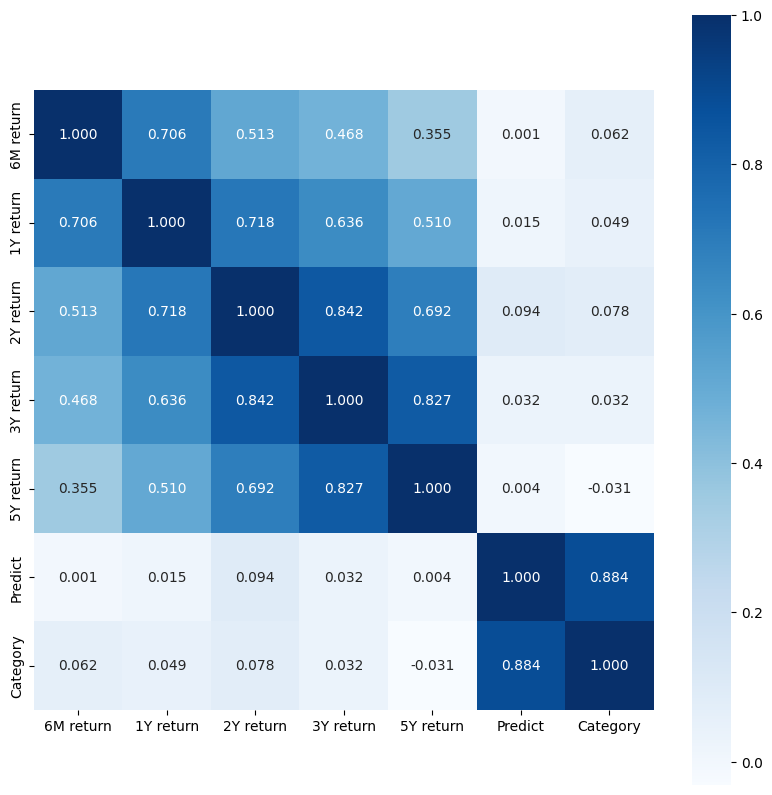

In [12]:
correlation=df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt='.3f', annot=True, annot_kws={'size':10}, cmap='Blues')

Train_test_split


In [13]:
data=df2.copy()
predict=data['Predict']
df2.head()
df2.drop(columns='Predict',inplace=True)


In [14]:
df2.head()
# df2.drop(columns='PE',inplace=True)

,6M return,1Y return,2Y return,3Y return,5Y return,Category
0,34.2,9.9,17.5,15.0,9.0,3
1,23.0,6.9,12.8,14.6,8.5,3
2,10.8,12.7,13.0,14.2,8.5,3
3,6.2,14.0,9.4,13.3,8.0,4
4,-4.4,3.6,6.1,10.7,8.0,4


In [15]:
# print(df2)
print(df2.isnull().sum())

6M return    0
1Y return    0
2Y return    0
3Y return    0
5Y return    0
Category     0
dtype: int64


In [16]:
df2

,6M return,1Y return,2Y return,3Y return,5Y return,Category
0,34.2,9.9,17.5,15.0,9.0,3
1,23.0,6.9,12.8,14.6,8.5,3
2,10.8,12.7,13.0,14.2,8.5,3
3,6.2,14.0,9.4,13.3,8.0,4
4,-4.4,3.6,6.1,10.7,8.0,4
...,...,...,...,...,...,...
235,7.7,13.3,9.6,2.7,13.7,5
236,2.4,17.9,10.3,4.1,13.0,5
237,-5.8,16.1,9.3,4.4,12.2,5
238,1.8,17.3,10.4,6.1,13.6,5


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

y = df2['Category']
df2.drop(columns='Category', inplace=True)
X = df2

data = pd.concat([X, y], axis=1)

class_1 = data[data['Category'] == 1]
class_2 = data[data['Category'] == 2]
other_classes = data[~data['Category'].isin([1, 2])]

print(len(other_classes)//10)
class_1_oversampled = resample(class_1, replace=True, n_samples=len(other_classes)//10, random_state=42)
class_2_oversampled = resample(class_2, replace=True, n_samples=len(other_classes)//10, random_state=42)

balanced_data = pd.concat([class_1_oversampled, class_2_oversampled, other_classes])

X_balanced = balanced_data.drop(columns=['Category'])
y_balanced = balanced_data['Category']

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.25, random_state=42, stratify=y_balanced
)

param_grid = {
    'n_estimators': [150, 200, 300],
    'max_depth': [5, 7],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [4, 6]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

results_df = pd.DataFrame({
    'Actual Class': y_test.values,
    'Predicted Class': y_test_pred
}).reset_index(drop=True)
print(results_df.head(20))

print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", test_accuracy)
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))



21
Fitting 3 folds for each of 36 candidates, totalling 108 fits
    Actual Class  Predicted Class
0              3                4
1              5                5
2              2                4
3              5                5
4              2                5
5              5                5
6              4                5
7              2                2
8              4                4
9              5                5
10             3                3
11             4                4
12             2                5
13             5                5
14             3                5
15             5                5
16             3                3
17             4                4
18             4                4
19             5                5
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy: 0.6875
Classification Report (Test):
               precision    recall  f1-score   support

           

In [26]:
results_df.to_csv("Gold_predictions.csv", index=False)

In [18]:

absolute_difference = abs(y_test.values - y_test_pred)


normalized_difference = absolute_difference.sum() / len(y_test)
print(f"Normalized Average Absolute Difference: {normalized_difference:.4f}")


Normalized Average Absolute Difference: 0.4844


In [19]:
y_test_proba = best_model.predict_proba(X_test)
confidence_levels = y_test_proba.max(axis=1)  
results_with_confidence = pd.DataFrame({
    'Actual Class': y_test.values,
    'Predicted Class': y_test_pred,
    'Confidence Level': confidence_levels
}).reset_index(drop=True)

print(results_with_confidence)


# results_with_confidence.to_excel('classification_results_with_confidence.xlsx', index=False)
print("Results with confidence levels saved to 'classification_results_with_confidence.xlsx'")


    Actual Class  Predicted Class  Confidence Level
0              3                4          0.483924
1              5                5          0.625700
2              2                4          0.347245
3              5                5          0.743193
4              2                5          0.475057
..           ...              ...               ...
59             1                1          0.941833
60             5                5          0.753491
61             5                5          0.533785
62             3                3          0.417968
63             1                1          0.941833

[64 rows x 3 columns]
Results with confidence levels saved to 'classification_results_with_confidence.xlsx'


In [20]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_test_pred, average='weighted')
print(f"Precision: {precision:.2f}")


Precision: 0.74


In [21]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_test_pred, average='weighted')
print(f"Recall: {recall:.2f}")


Recall: 0.69


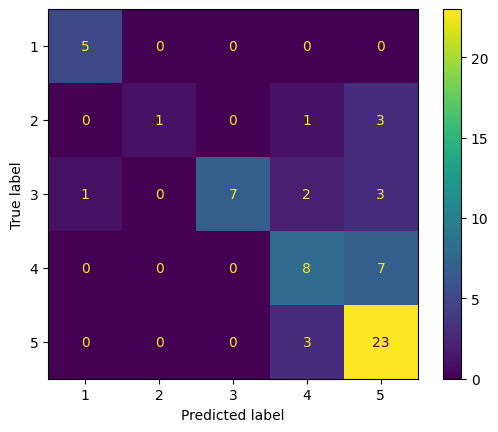

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()


In [23]:
y_train_pred = best_model.predict(X_train)

total_correct_train = sum(y_train.values == y_train_pred)
total_misclassified_train = len(y_train) - total_correct_train
accuracy_train = total_correct_train / len(y_train)

print(f"Total Correct Classifications (Train): {total_correct_train}")
print(f"Total Misclassifications (Train): {total_misclassified_train}")
print(f"Accuracy (Train): {accuracy_train}")


Total Correct Classifications (Train): 165
Total Misclassifications (Train): 24
Accuracy (Train): 0.873015873015873


In [24]:
print(len(df2))
print(len(y))

240
240


In [25]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report


random_indices = np.random.choice(df2.index, size=50, replace=False)
X_random = df2.loc[random_indices] 
y_random = y.loc[random_indices]  

y_random_pred = best_model.predict(X_random)

accuracy_random = accuracy_score(y_random, y_random_pred)
classification_report_random = classification_report(y_random, y_random_pred)


print("Accuracy on Un-Oversampled Data (Random 100 Samples):", accuracy_random)
print("Classification Report on Un-Oversampled Data:\n", classification_report_random)


comparison_df = pd.DataFrame({
    'Actual Class': y_random.values,
    'Predicted Class': y_random_pred
}).reset_index(drop=True)

print(comparison_df)


Accuracy on Un-Oversampled Data (Random 100 Samples): 0.82
Classification Report on Un-Oversampled Data:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.67      0.67      0.67         3
           3       0.86      0.55      0.67        11
           4       0.83      0.77      0.80        13
           5       0.81      1.00      0.90        22

    accuracy                           0.82        50
   macro avg       0.83      0.80      0.81        50
weighted avg       0.82      0.82      0.81        50

    Actual Class  Predicted Class
0              1                1
1              5                5
2              4                4
3              3                3
4              5                5
5              4                5
6              3                2
7              5                5
8              5                5
9              2                2
10             4               